<div style="border: solid bisque 2px; padding: 20px; font-size: 16px;"><h1>Финальный проект "Банк - Сегментация пользователей по потреблению".</h1></div>

<div class='alert alert-success'> 👍
Спасибо за работу! Дашборд принят, все критерии соблюдены

### **Исходная цель исследования:**  
Необходимо уменьшить отток клиентов.

Заказчик: Менеджер продуктов. 

### Задача**:** 
- Сегментация клиентов по количеству потребляемых продуктов. 
- Выявление и анализ сегмента, наиболее склонного к оттоку. 
- Дать рекомендации по уменьшению оттока этого сегмента.


### **Описание данных:**

Датасет содержит данные о клиентах банка «Метанпром». Банк располагается в Ярославле и областных городах: Ростов Великий и Рыбинск.

Колонки:

- `userid` — идентификатор пользователя,
- `score` — баллы кредитного скоринга,
- `City` — город,
- `Gender` — пол,
- `Age` — возраст,
- `Objects` — количество объектов в собственности,
- `Balance` — баланс на счёте,
- `Products` — количество продуктов, которыми пользуется клиент,
- `CreditCard` — есть ли кредитная карта,
- `Loyalty` — активный клиент,
- `estimated_salary` — заработная плата клиента,
- `Churn` — ушёл или нет.

### Декомпозиция**:**

#### 1. Загрузка данных,  библиотек, знакомство с данными.
#### 2. Предобработка данных.
#### 3. Исследовательский анализ данных.
#### 4. Сегментация клиентов на основе данных о количестве потребляемых продуктов.
#### 5. Статистическая проверка гипотез.
#### 6. Выводы и рекомендации.
       

#### 1. Загрузка данных,  библиотек, знакомство с данными.

In [1]:
#импорт библиотек для работы
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st
import numpy as np


In [2]:
#загрузка данных
try:
    df = pd.read_csv('bank_dataset.csv')
except:    
    df = pd.read_csv('/Users/Professional/Desktop/аналитика/projects/final/bank_dataset.csv')


In [3]:
#загрузка данных
try:
    df1 = pd.read_csv('bank_dataset.csv')
except:    
    df1 = pd.read_csv('/Users/Professional/Desktop/аналитика/projects/final/bank_dataset.csv')


In [4]:
df1['Products'].value_counts() / len(df1['Products']) * 100

1    50.84
2    45.90
3     2.66
4     0.60
Name: Products, dtype: float64

In [5]:
#знакомство с датасетом
display(df.head(20), df.info(), df.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   userid            10000 non-null  int64  
 1   score             10000 non-null  int64  
 2   City              10000 non-null  object 
 3   Gender            10000 non-null  object 
 4   Age               10000 non-null  int64  
 5   Objects           10000 non-null  int64  
 6   Balance           6383 non-null   float64
 7   Products          10000 non-null  int64  
 8   CreditCard        10000 non-null  int64  
 9   Loyalty           10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  Churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


,userid,score,City,Gender,Age,Objects,Balance,Products,CreditCard,Loyalty,estimated_salary,Churn
0,15677338,619,Ярославль,Ж,42,2,NaN,1,1,1,101348.88,1
1,15690047,608,Рыбинск,Ж,41,1,83807.86,1,0,1,112542.58,0
2,15662040,502,Ярославль,Ж,42,8,159660.80,3,1,0,113931.57,1
3,15744090,699,Ярославль,Ж,39,1,NaN,2,0,0,93826.63,0
4,15780624,850,Рыбинск,Ж,43,2,125510.82,1,1,1,79084.10,0
5,15616748,645,Рыбинск,М,44,8,113755.78,2,1,0,149756.71,1
6,15635267,822,Ярославль,М,50,7,NaN,2,1,1,10062.80,0
7,15698884,376,Ростов Великий,Ж,29,4,115046.74,4,1,0,119346.88,1
8,15835101,501,Ярославль,М,44,4,142051.07,2,0,1,74940.50,0
9,15635125,684,Ярославль,М,27,2,134603.88,1,1,1,71725.73,0


None

0

   
- В данных нет явных дубликатов, но есть пропуски в столбце Balance. 
    
- Аномальные значения следует рассмотреть подробнее по колонке возраст. 
    
- Также некоторые названия колонок неудобны для работы, сделаем переименование.

#### 2. Предобработка данных.

In [6]:
#приведем названия столбцов к нижнему регистру
df.columns = df.columns.str.lower()

In [7]:
# приведем названия колонок к змеиному формату
df = df.rename(columns={'userid': 'user_id', 'creditcard': 'credit_card'})

In [8]:
# проверим на наличие не явных дубликатов без колонки user_id
df.duplicated(subset=['score','city','gender','age','objects','balance','products','credit_card','loyalty','estimated_salary','churn']).sum()

0

In [9]:
# проверим на наличие не явных дубликатов по колонке user_id
df.duplicated(subset=['user_id']).sum()

0

In [10]:
# общее количество пропусков 
df['balance'].isna().sum()

3617

In [11]:
# процент пропущенных значений
round(df['balance'].isna().sum()/len(df['balance'])*100)

36

In [12]:
# создадим датасет с пропусками
df_nan= df[df['balance'].isnull() == True ] 
df_nan.head(3)

,user_id,score,city,gender,age,objects,balance,products,credit_card,loyalty,estimated_salary,churn
0,15677338,619,Ярославль,Ж,42,2,NaN,1,1,1,101348.88,1
3,15744090,699,Ярославль,Ж,39,1,NaN,2,0,0,93826.63,0
6,15635267,822,Ярославль,М,50,7,NaN,2,1,1,10062.80,0


In [13]:
# посчитаем количество пропусков в разрезе по городам
df_nan.groupby('city')['loyalty'].count()

city
Рыбинск      1199
Ярославль    2418
Name: loyalty, dtype: int64

In [14]:
# посчитаем количество пропусков в разрезе по наличию кредитной карты
df_nan.groupby('credit_card').agg({'credit_card': 'count'})

,credit_card
credit_card,
0,1025
1,2592


In [15]:
# посчитаем количество пропусков в разрезе по количеству продуктов
df_nan.groupby('products')['loyalty'].count()

products
1     905
2    2600
3      98
4      14
Name: loyalty, dtype: int64

In [16]:
# посчитаем количество пропусков в разрезе по активности
df_nan.groupby('loyalty')['loyalty'].count()

loyalty
0    1744
1    1873
Name: loyalty, dtype: int64

In [17]:
# посчитаем количество пропусков в разрезе по "ушел или нет" клиент
df_nan.groupby('churn')['loyalty'].count()

churn
0    3117
1     500
Name: loyalty, dtype: int64


    Вывод: 
    
-  Типы данных - корректны, дубликаты отсутствуют. В столбце баланса клиента отсутствовало 36% значений. Можно предположить, что это клиенты без дебетового баланса.   
-  Из подсчета в разрезе по признаку "оттока"  видно, что из 3617 пропусков 3117 клиентов имеют пропуски по балансу по причине того, что они перестали быть клиентами банка. По оставшимся 500 пропускам возможно у некоторых клиентов нет дебетового счета, они пользуются другими продуктами банка.
В таком случае было бы релевантно заполнить пропуски нулевым значением, но  по-скольку это данные связанные с денежными средствами клиентов и  вероятно что дебетовый счет не открыт, оставим как есть.


### **Исследовательский анализ данных**

Рассчитаем основные описательные статистики для наших данных.

In [18]:
df.drop('user_id', axis=1).describe()

,score,age,objects,balance,products,credit_card,loyalty,estimated_salary,churn
count,10000.000000,10000.000000,10000.000000,6383.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,119827.493793,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,30095.056462,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,3768.690000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,100181.975000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,119839.690000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,139512.290000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


- В целом из 10000 клиентов в отток попало 20,3%.
- Клиенты банка - это люди от 18 до 92 лет. Средний возраст клиента 39 лет.
- Минимальный балл кредитного скорринга 350, максимальный 850. В среднем 650.
- 70% клиентов имеют кредитную карту.
- 51% - это лояльные клиенты.
- Клиенты используют от 1 до 4 продуктов банка. Средний показатель - 1,5
- Средняя зарплата состовляет около 100000 руб. Минимальная 11,58. Слишком маленький показатель. Необходимо исследовать этот показатель в дальнейшем.

**Изучение распределения признаков.**

Для числовых признаков построем гистограмму распределения

In [19]:
# создадим список с числовыми переменными
num_col=['score', 'age', 'balance', 'estimated_salary']

In [20]:
# создадим список с названиями графиков
titles_num = ['Баллы кредитного скоринга', \
                  'Возраст клиентов', \
                  'Баланс на счёте', \
                  'Заработная плата клиентов']

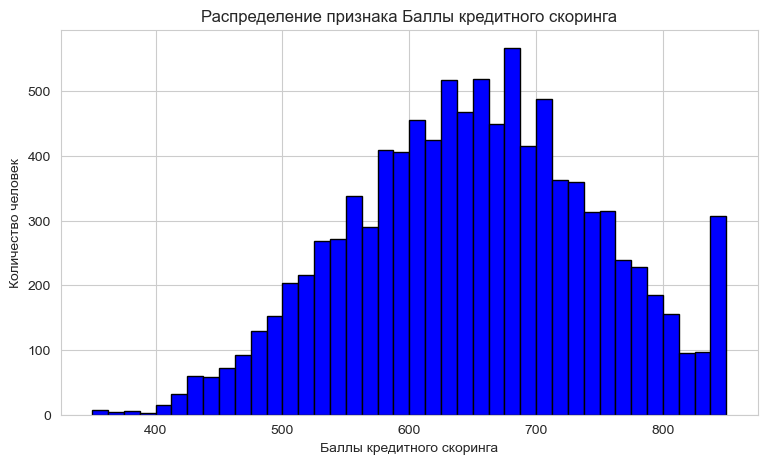

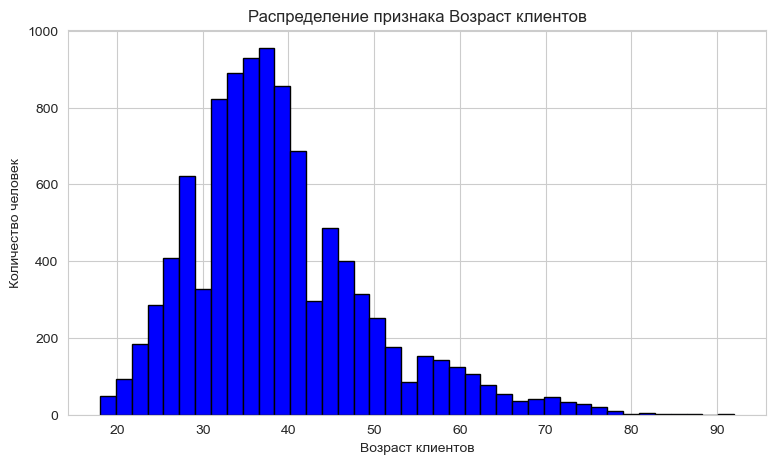

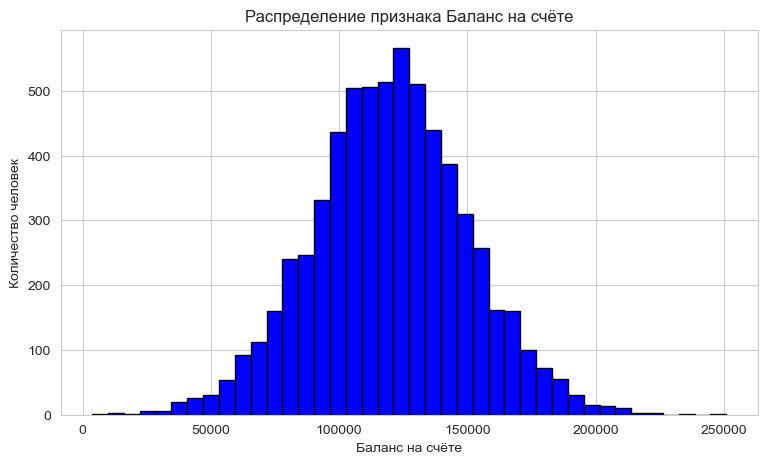

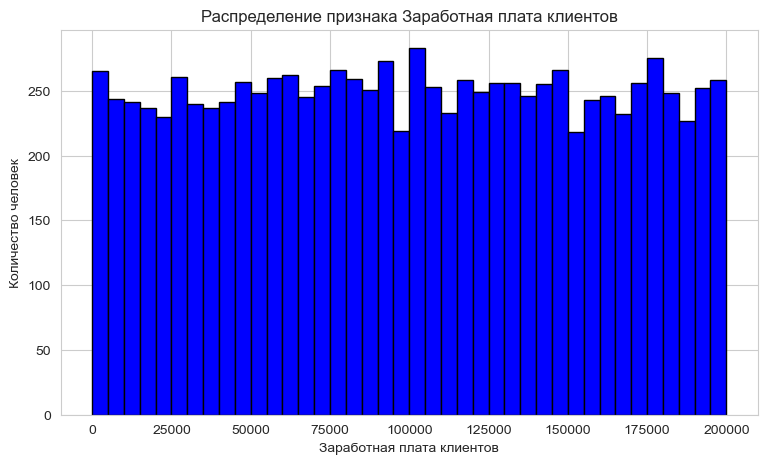

In [21]:
for i in range(len(num_col)):
    sns.set_style('whitegrid')
    plt.figure(figsize=(9, 5))
    plt.hist(df[num_col[i]], color = 'blue', edgecolor = 'black', bins = 40)
    plt.title(f"Распределение признака {titles_num[i]}")
    plt.ylabel("Количество человек")
    plt.xlabel(titles_num[i])
    plt.show();

Из графиков распределения числовых переменных можно проследить следующие закономерности:

- Распределение признака "Баллы кредитного скорринга" близко к нормальному, за исключением максимальной отметки 850 баллов, которой соответсвуют 310 человек.
- Распределение признака "Возраст" имеет длинный правый хвост, возможно здесь присутствуют аномально высокие значения.
- Распределение признака "заработная плата" отлично от нормального, распределение достаточно равномерное. Эти данные также следует проверить на аномальные значения.

Для выявления аномалий нарисуем boxplot по числовым переменным

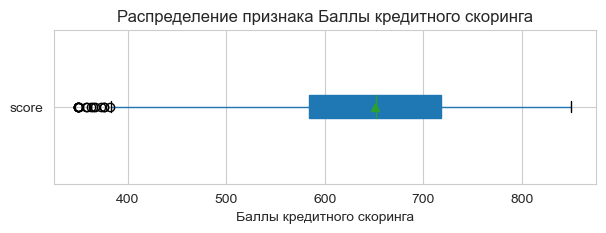

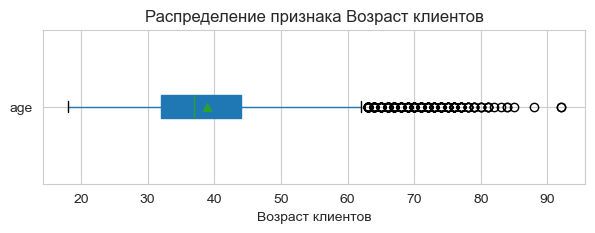

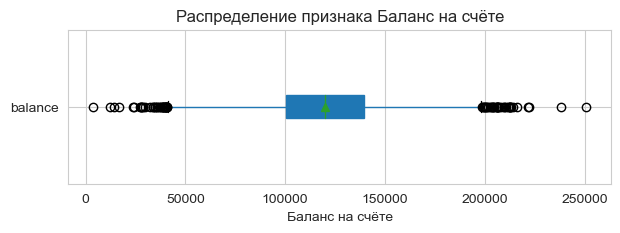

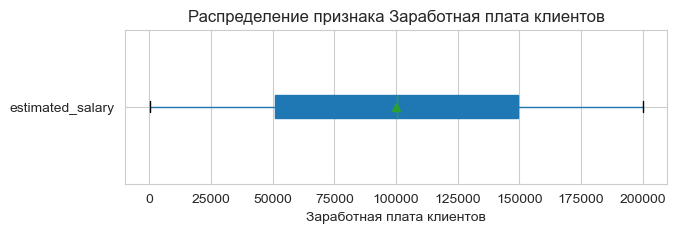

In [22]:
for i in range(len(num_col)):
    plt.figure(figsize=(7, 2))
    df.boxplot(num_col[i], patch_artist=True, vert=False, showmeans=True )
    plt.title(f"Распределение признака {titles_num[i]}")
    plt.xlabel(titles_num[i]) 
    plt.show();

Выявлены аномалии. Посмотрим перцентели по столбцам age, score и balance

In [23]:
np.percentile(df['age'], [95, 97.5, 99])

array([60., 66., 72.])

Всего 1% пользователей старше 72 лет, 5% - старше 60.

In [24]:
np.percentile(df['score'], [5, 2.5, 1])

array([489., 461., 432.])

Всего 1% пользователей имеет балл кредитного скорринга ниже 432, 5% - ниже 489.

In [25]:
np.percentile(df['balance'], [95, 97.5, 99])

array([nan, nan, nan])

Аномалии в столбце баланса связаны с пропусками, которых около 30 % и удалять их нельзя.

 Для дальнейшего анализа нам следует убрать из исследования данные очень пожилых клиентов (более 72 лет), клиентов с низким показателем кредитного скорринга (менее 432)

In [26]:
df=df[df['score'] > 432]

In [27]:
df=df[df['age'] < 72]

Для категориальных переменных построем столбчатую диаграмму

In [28]:
# создадим список с категориальными переменными
cat_col=['city', 'gender', 'objects', 'products', 'credit_card', 'loyalty', 'churn']

In [29]:
# создадим список с названиями графиков
titles_cat =  ['Город','Пол','Количество объектов в собственности','Количество используемых продуктов',\
               'Наличие кредитной карты','Активный клиент','Отток']

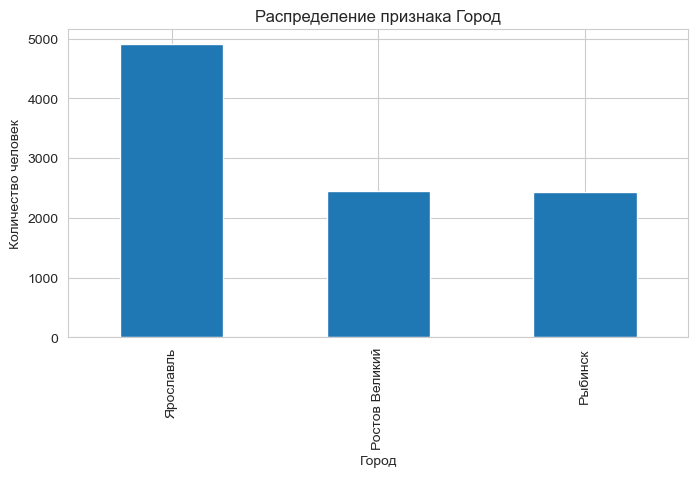

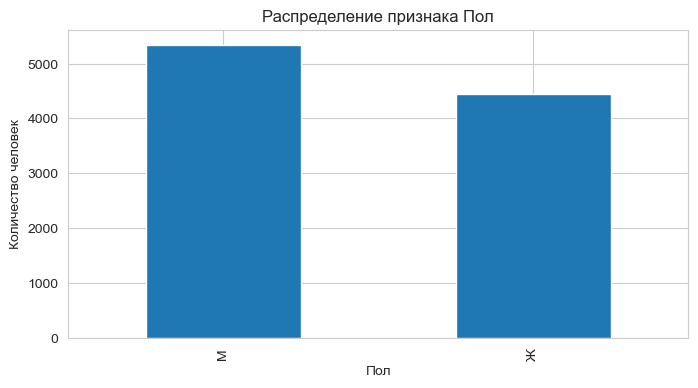

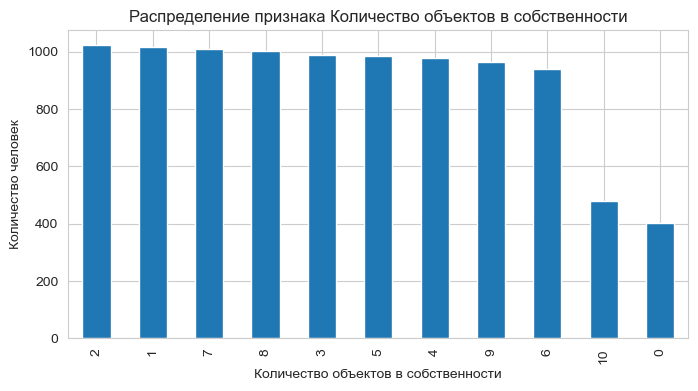

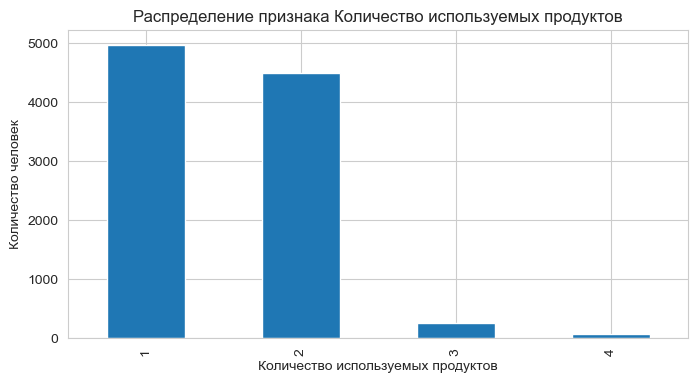

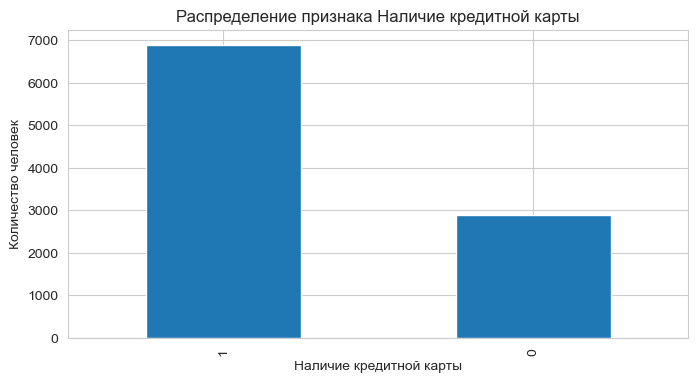

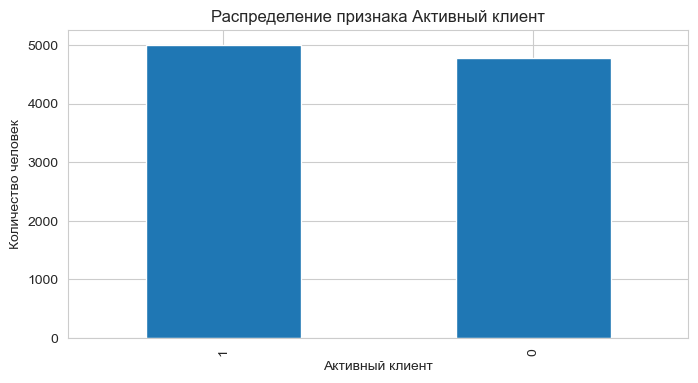

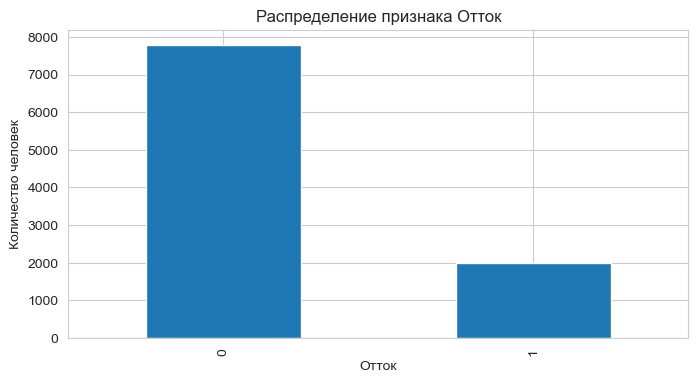

In [30]:
for i in range(len(cat_col)):
    plt.figure(figsize=(8, 4))
    df[cat_col[i]].value_counts().plot.bar()
    plt.title(f"Распределение признака {titles_cat[i]}")
    plt.ylabel("Количество человек")
    plt.xlabel(titles_cat[i]) 
    plt.show(); 

Из графиков категориальных переменных можно проследить следующие закономерности:

- Почти половина клиентов проживает в городе Ярославль. Остальные поровну поделены между Рыбинском и Ростовом.
- Мужчин больше, чем женщин почти на 1000 человек.
- Распределение по признаку "Количество объектов в собственности" от 1 до 9 - равномерное.
- Половина клиентов - пользуется только 1 продуктом, 4500 клиентов - двумя, и только 500 человек - используют 3 и более продукта.
- Почти 7000 клиентов имеют кредитную карту.
- В отток ушло около 2000 клиентов.

**Корреляционный анализ**

Преобразуем категориальные переменные.

In [31]:
cor_df = pd.get_dummies(df)
cor_df.head()

,user_id,score,age,objects,balance,products,credit_card,loyalty,estimated_salary,churn,city_Ростов Великий,city_Рыбинск,city_Ярославль,gender_Ж,gender_М
0,15677338,619,42,2,NaN,1,1,1,101348.88,1,0,0,1,1,0
1,15690047,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0,1,0
2,15662040,502,42,8,159660.80,3,1,0,113931.57,1,0,0,1,1,0
3,15744090,699,39,1,NaN,2,0,0,93826.63,0,0,0,1,1,0
4,15780624,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0,1,0


Удалим столбец gender_Ж и переименуем столбец gender_М. В новом столбце gender: Мужчина - это 1, Женщина - это 0.

In [32]:
cor_df=cor_df.drop(['gender_Ж'], axis=1)

In [33]:
cor_df=cor_df.rename(columns={"gender_М": "gender"})

In [34]:
# удалим колонку user_id, она в анализе не участвует
corr_df= cor_df.drop(['user_id'], axis=1)

Построем карту корреляций между признаками.

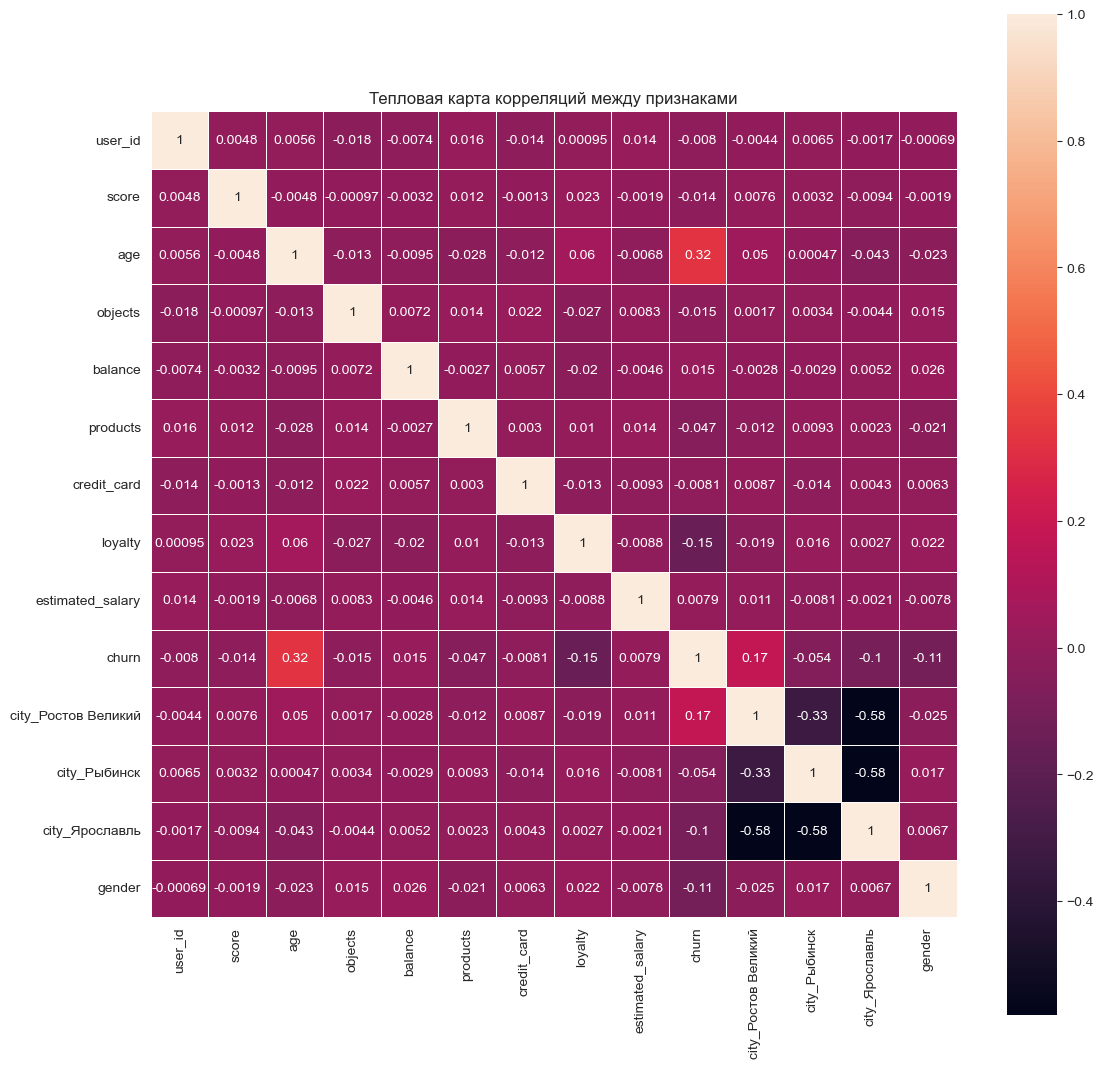

In [35]:
plt.figure(figsize=(13, 13))
sns.heatmap(cor_df.corr(), square = True, annot = True, linewidths=0.5)
plt.title('Тепловая карта корреляций между признаками')
plt.show()

Вывод: сильно коррелирующие признаки отсутствуют. Не высокая взаимосвязь наблюдается между оттоком и возрастом (0,29). Между показателями оттока и количеством используемых продуктов отрицательная слабая взаимосвязь (-0,048)

#### 4. Сегментация клиентов на основе данных о количестве потребляемых продуктов.

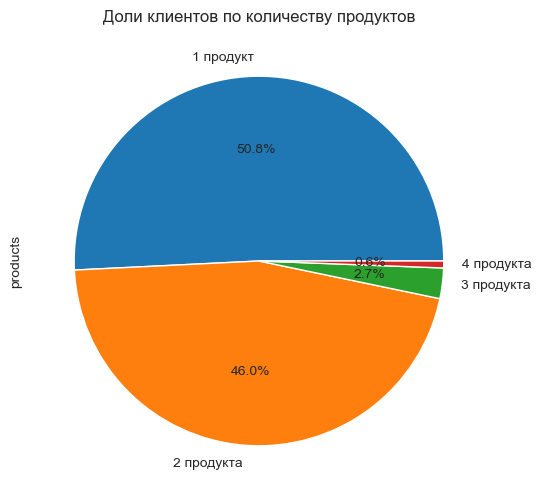

In [36]:
df['products'].value_counts().plot.pie(labels=['1 продукт', '2 продукта', '3 продукта', '4 продукта'], 
                                       autopct='%.1f%%', 
                                       figsize=(6,6))
plt.title('Доли клиентов по количеству продуктов')


plt.show()

Почти все клиенты имеют 1 или 2 продукта и лишь 2,7 % пользуются 3 продуктами и 0,6 % -4-мя.

In [37]:
# посчитаем долю ушедших от числа клиентов в каждой группе по  количеству потребляемых продуктов
t = df.groupby('products')\
  .agg({'user_id': 'count', 'churn': 'mean'})\
  .sort_values(by='churn', ascending=False)\
  .rename(columns={'user_id': 'Кол-во клиентов', 'churn': 'Доля ушедших клиентов'})\
  .style.format({'Доля ушедших клиентов': '{:.2%}'})\
  
t


,Кол-во клиентов,Доля ушедших клиентов
products,,
4,59,100.00%
3,261,82.76%
1,4972,27.70%
2,4499,7.60%


Клиенты, имеющие 4 продукта банка все ушли в отток, c 3-мя продуктами на 82.7% отточные, клиенты с 2 продуктами на 7.58% в оттоке и с 1 продуктом на 27.7%.

In [38]:
# посчитаем долю ушедших клиентов от общего числа оттока по  количеству потребляемых продуктов
d = df.groupby('products')['churn'].sum() / df['churn'].sum()*100
d

products
1    69.057172
2    17.151454
3    10.832497
4     2.958877
Name: churn, dtype: float64

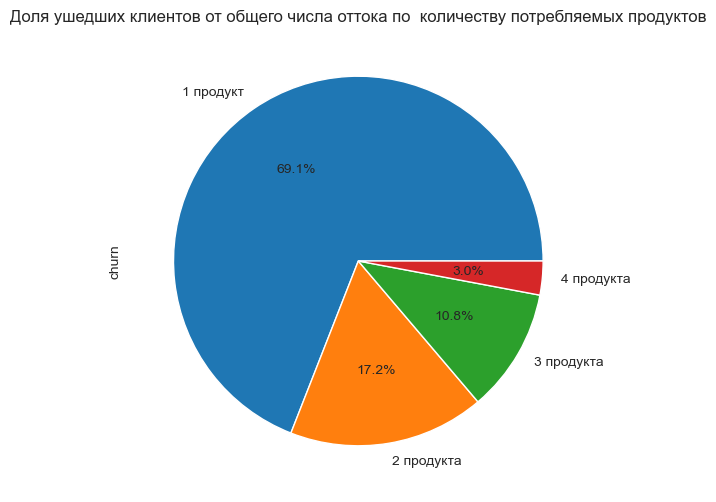

In [39]:
d.plot.pie(labels=['1 продукт', '2 продукта', '3 продукта', '4 продукта'], 
                                       autopct='%.1f%%', 
                                       figsize=(6,6))
plt.title('Доля ушедших клиентов от общего числа оттока по  количеству потребляемых продуктов')


plt.show()

От общего числа ушедших клиентов лидирует группа с 1 продуктом, далее отток пропорционален количеству клиентов в каждой группе оттока.

In [40]:
# посмотрим на процент оттока по городам
df.groupby(['city'])\
  .agg({'user_id': 'count', 'churn': 'mean'})\
  .sort_values(by='churn', ascending=False)\
  .rename(columns={'user_id': 'Кол-во клиентов', 'churn': 'Доля ушедших клиентов'})\
  .style.format({'Доля ушедших клиентов': '{:.2%}'})\
  


,Кол-во клиентов,Доля ушедших клиентов
city,,
Ростов Великий,2453,32.49%
Рыбинск,2432,16.57%
Ярославль,4906,16.18%


Лидером по оттоку клиентов является Ростов Великий.

Посмотрим на распределение числовых признаков по оставшимся и ушедшим клиентам.

In [41]:
df["churn_cat"] = df["churn"].astype("category")

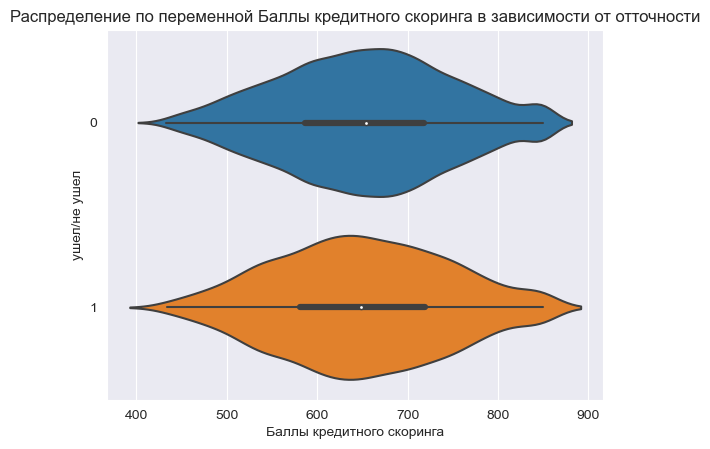

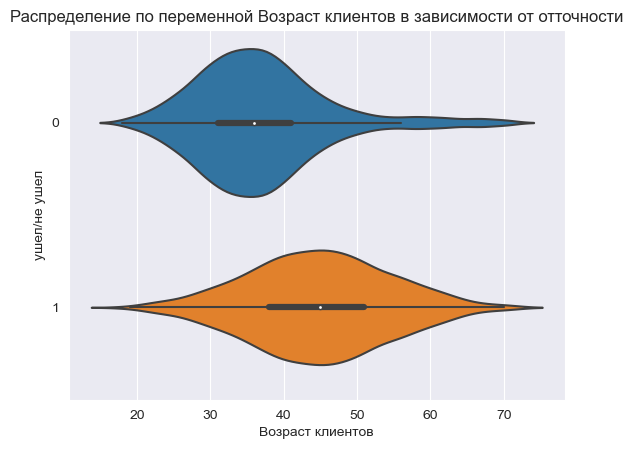

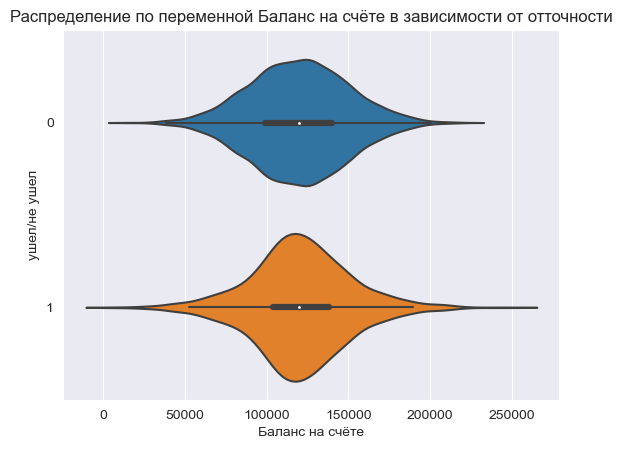

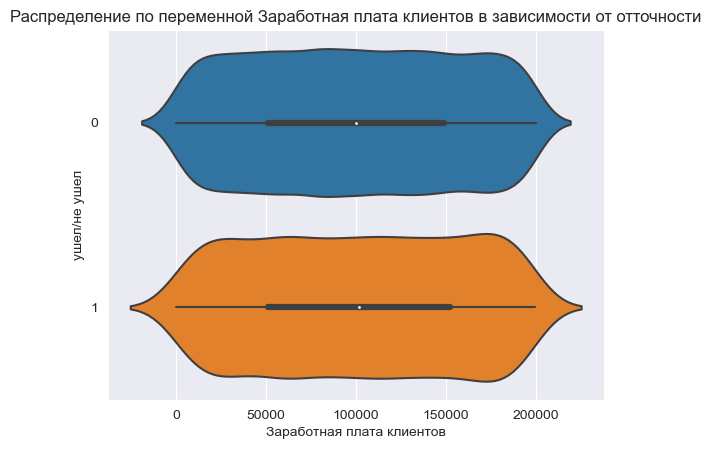

In [42]:
# применяем стиль darkgrid из библиотеки seaborn
sns.set_style('darkgrid')

for i in range(len(num_col)):
    sns.violinplot(x=num_col[i], y='churn_cat', data=df)
    plt.title(f"Распределение по переменной {titles_num[i]} в зависимости от отточности")
    plt.xlabel(titles_num[i])
    plt.ylabel("ушел/не ушел")
    plt.show()

Различия в оставшихся и ушедших клиентах есть только по возрасту. Оставшиеся клиенты моложе, средний возраст у оставшихся около 35 лет  и 45 лет у ушедших.

Посмотрим на распределение данных ушедших и оставшихся клиентов по признакам в разрезе по количеству продуктов.

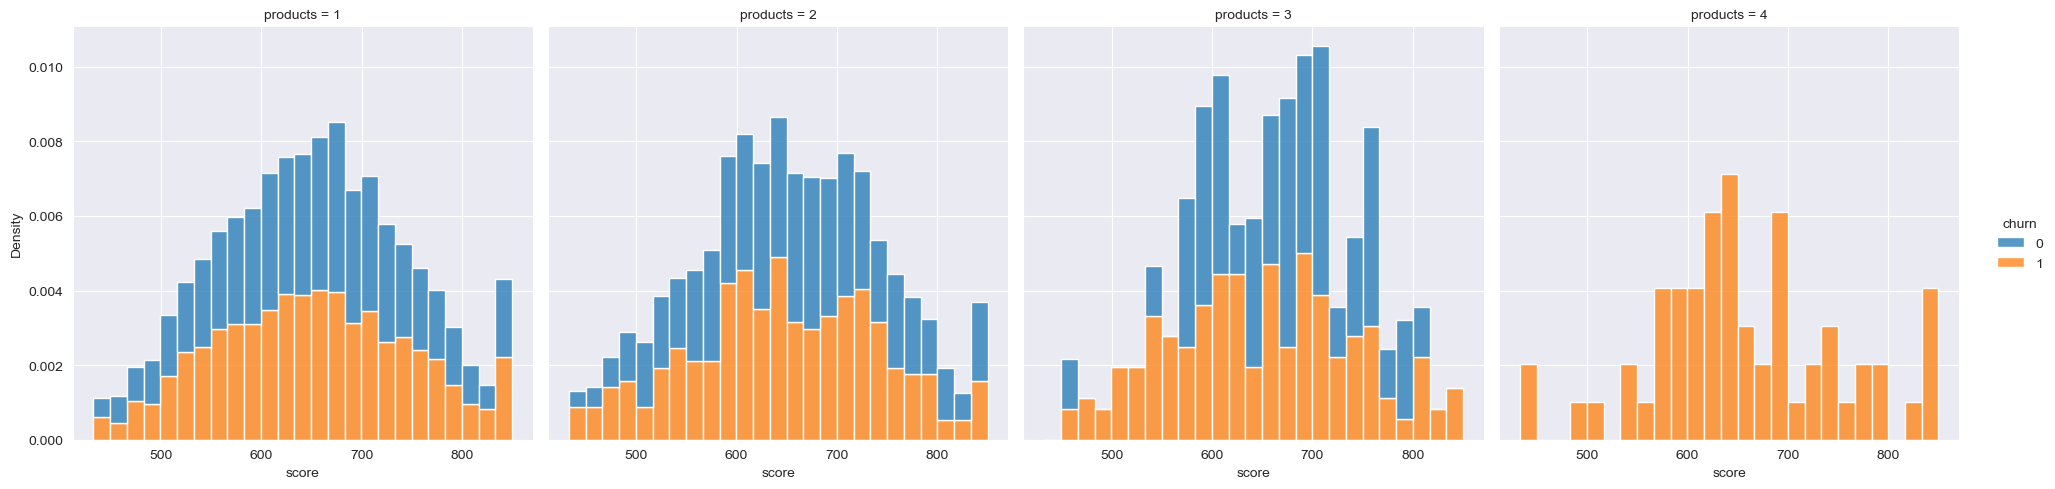

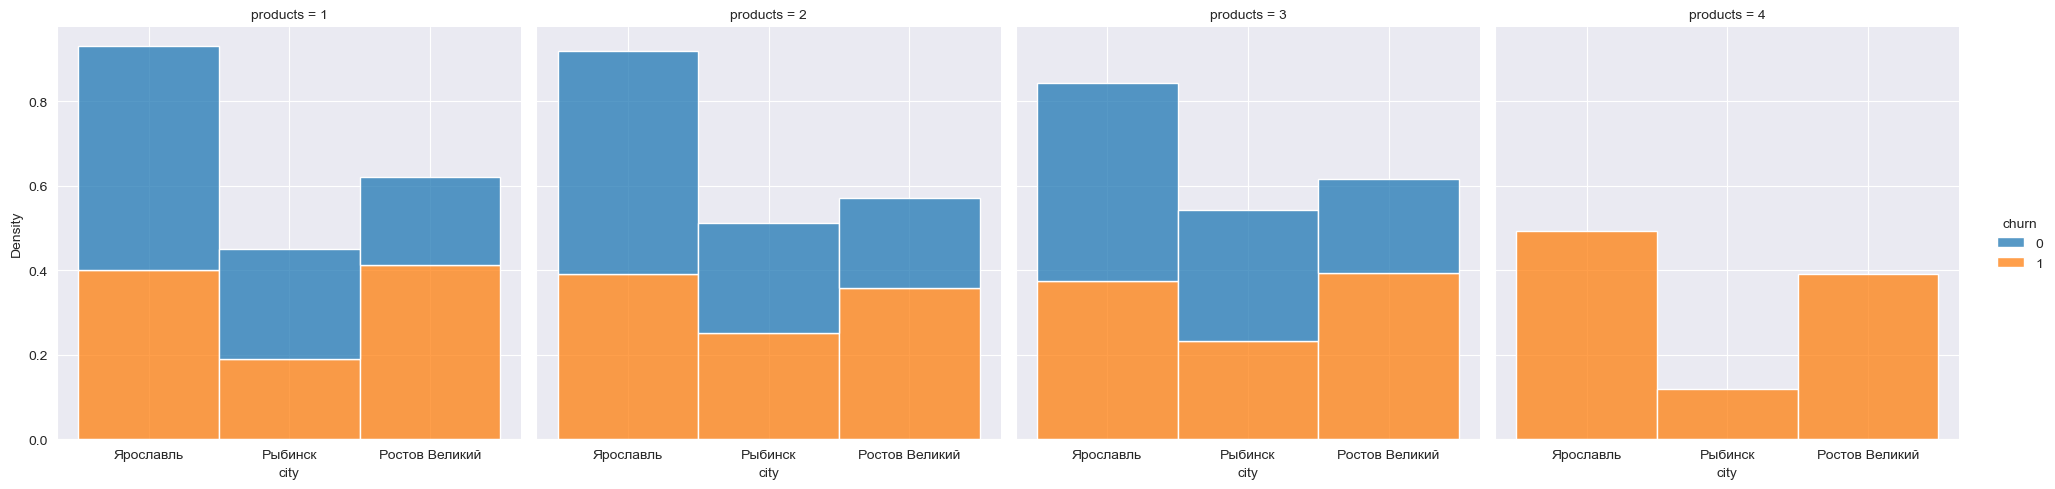

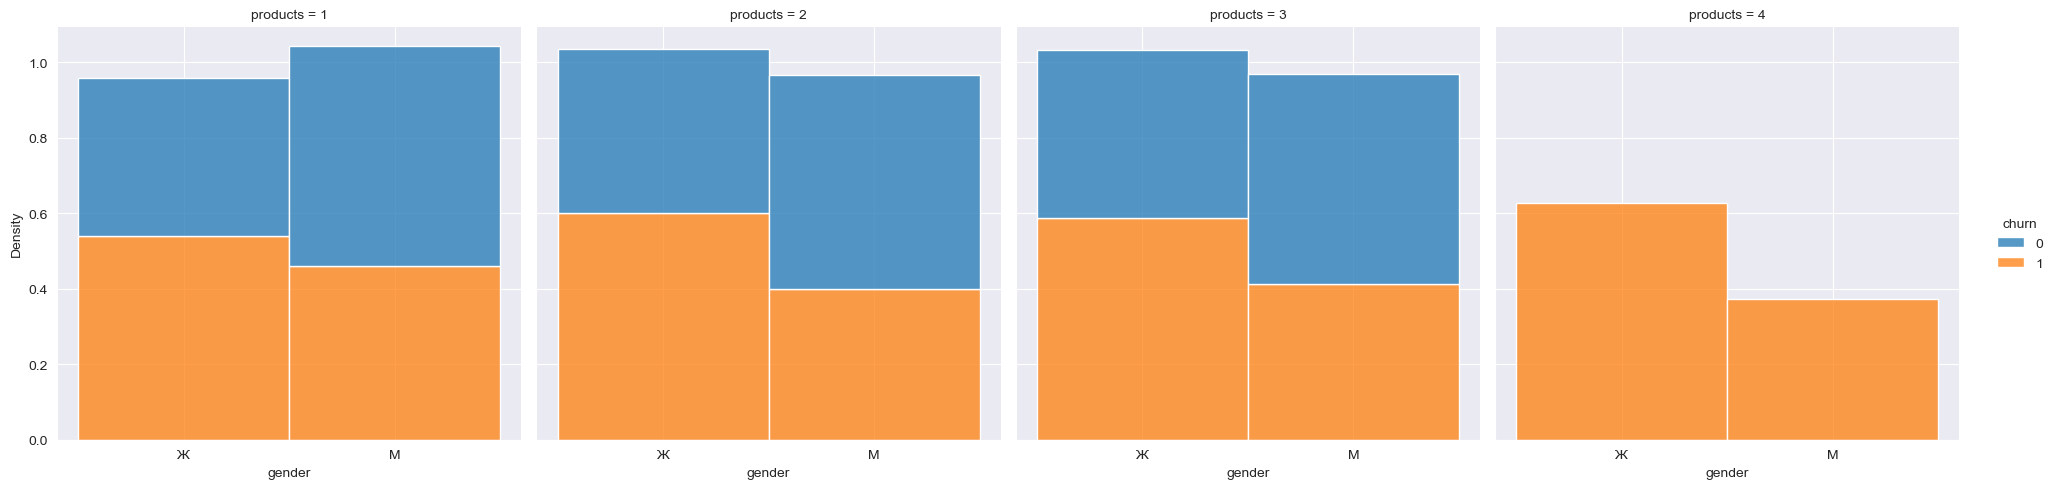

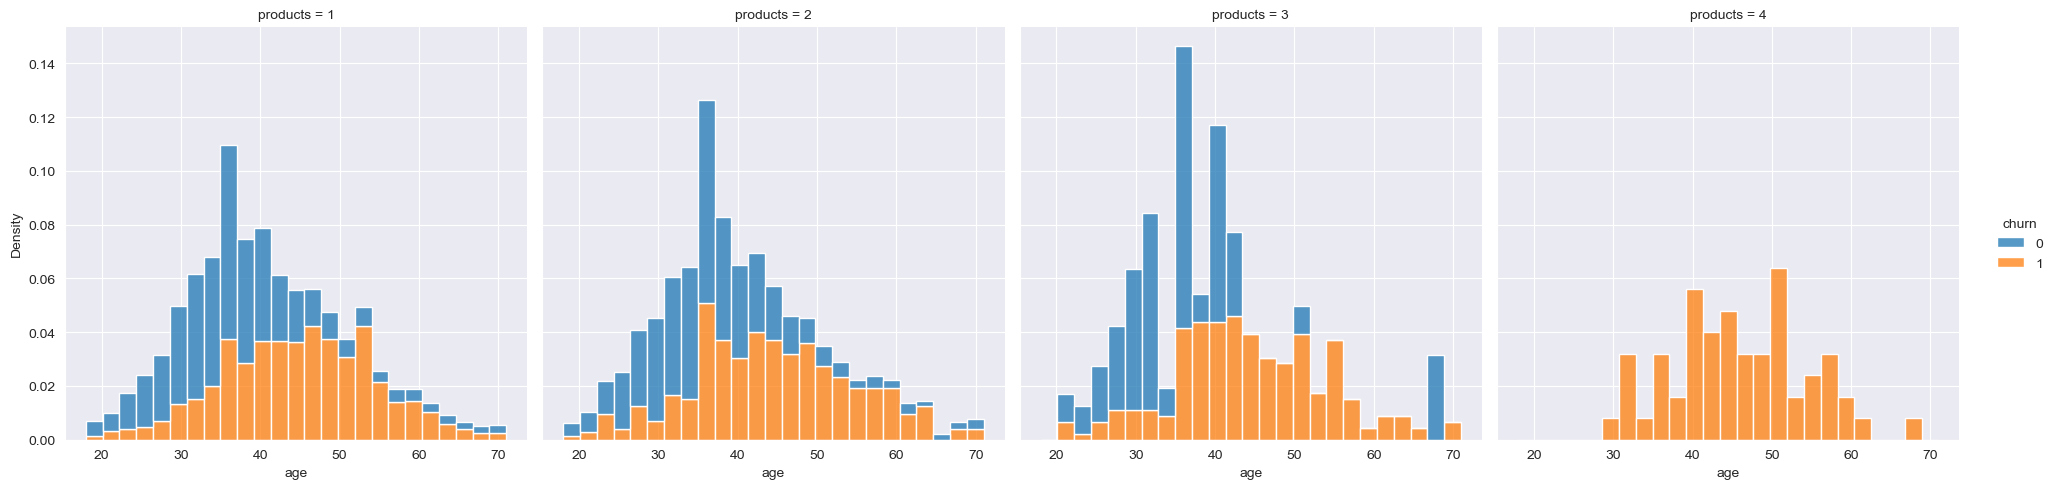

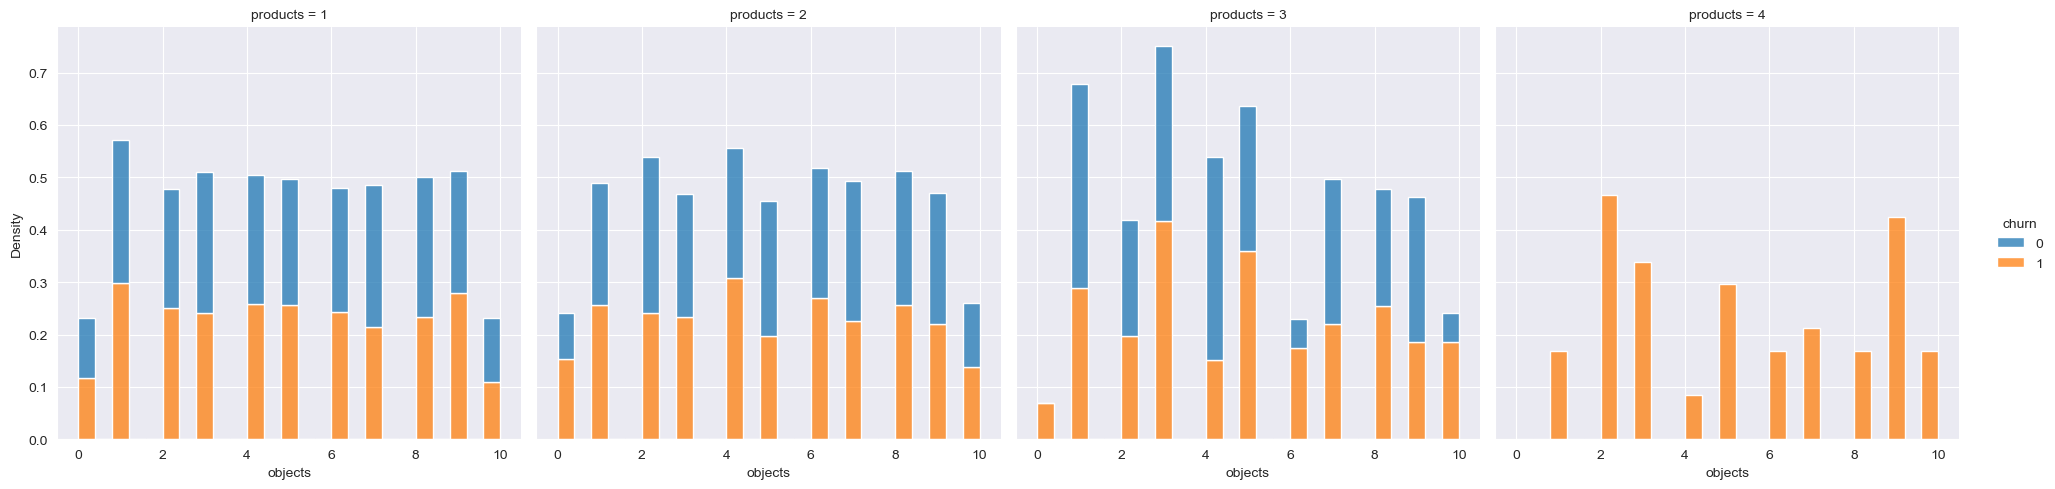

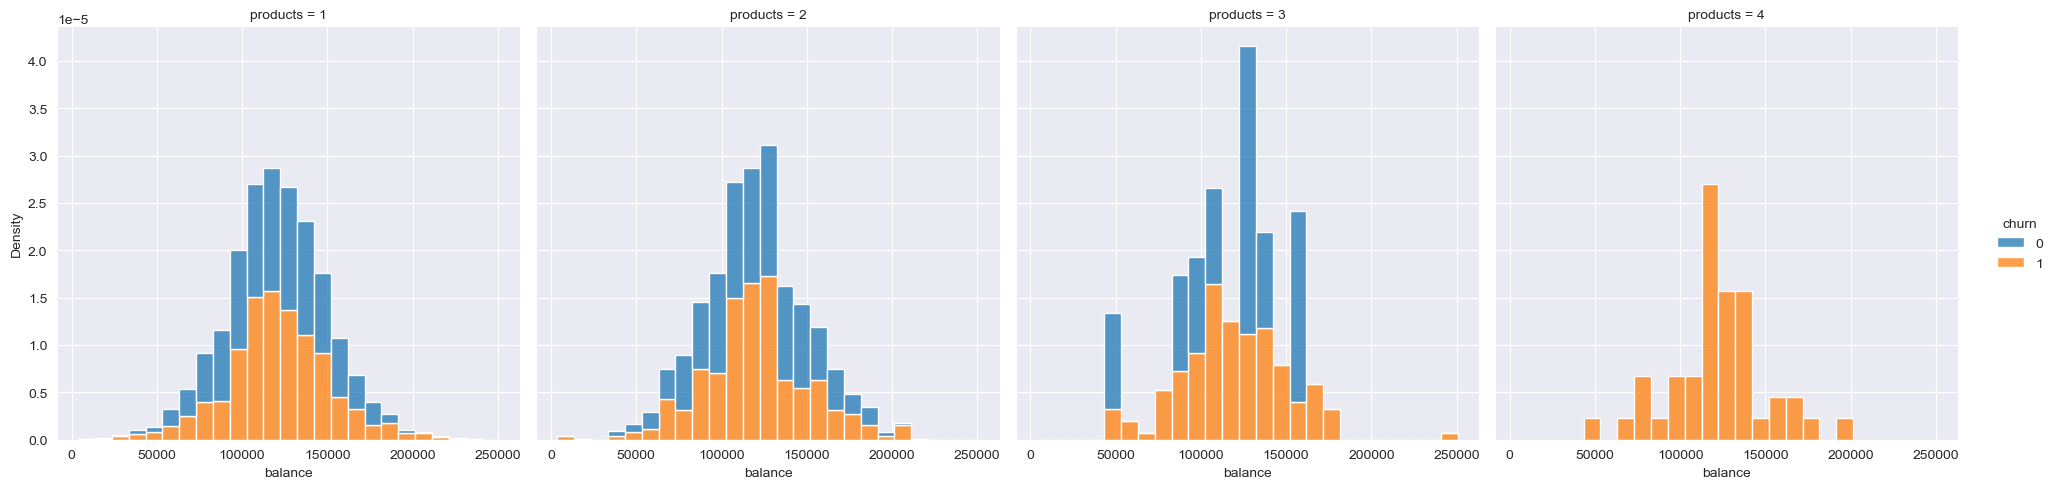

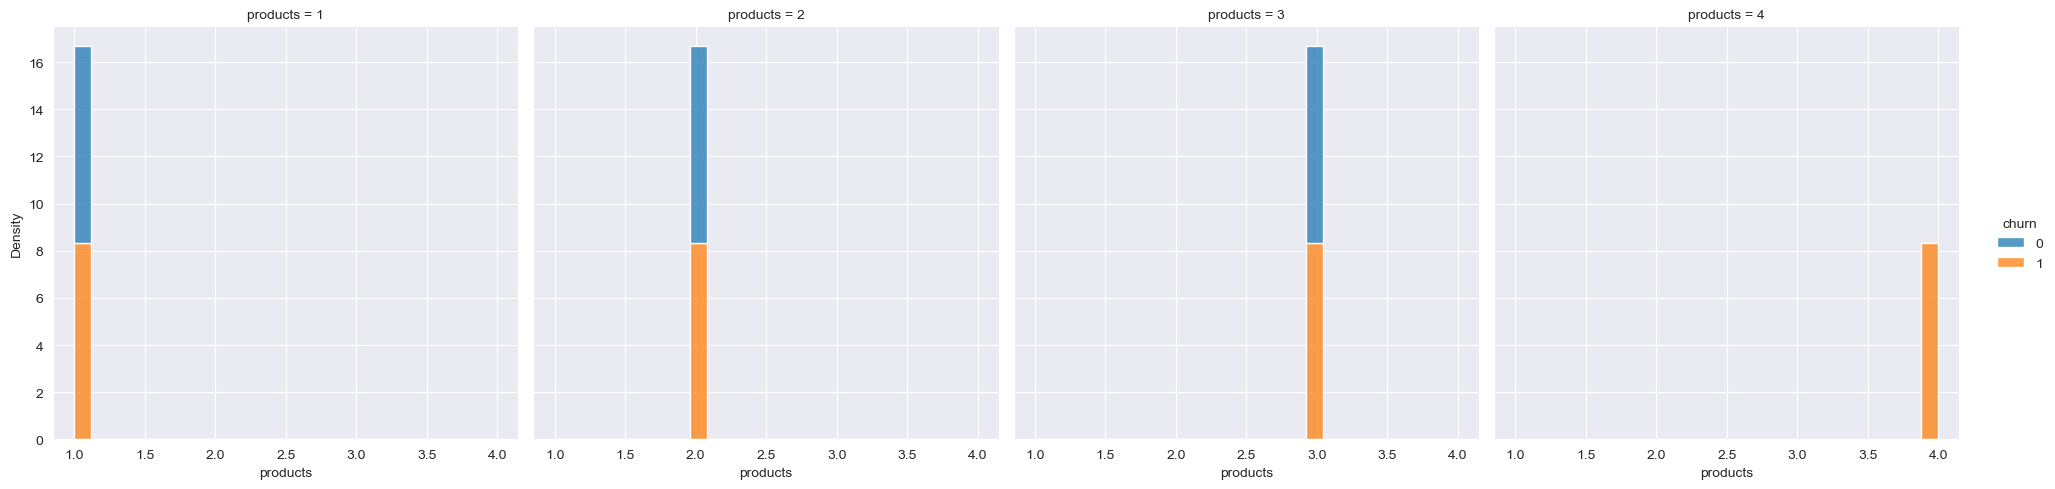

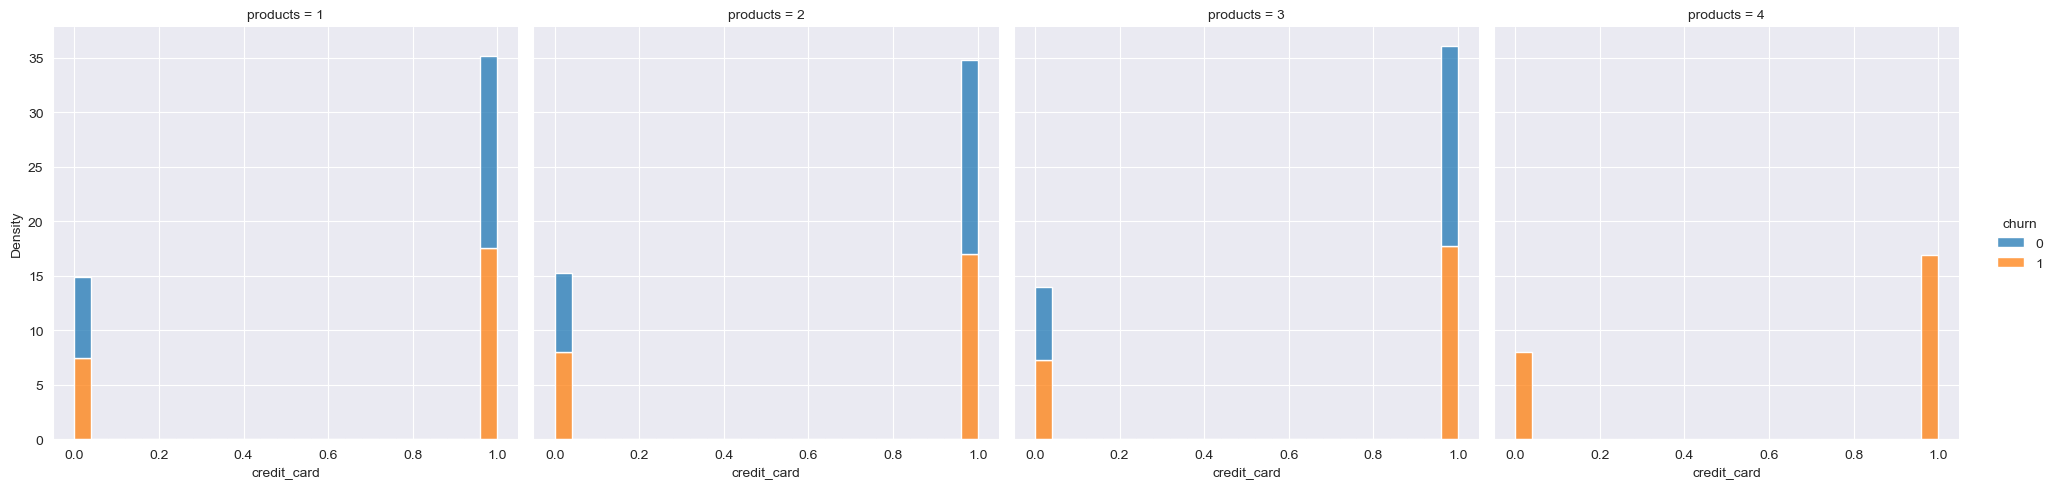

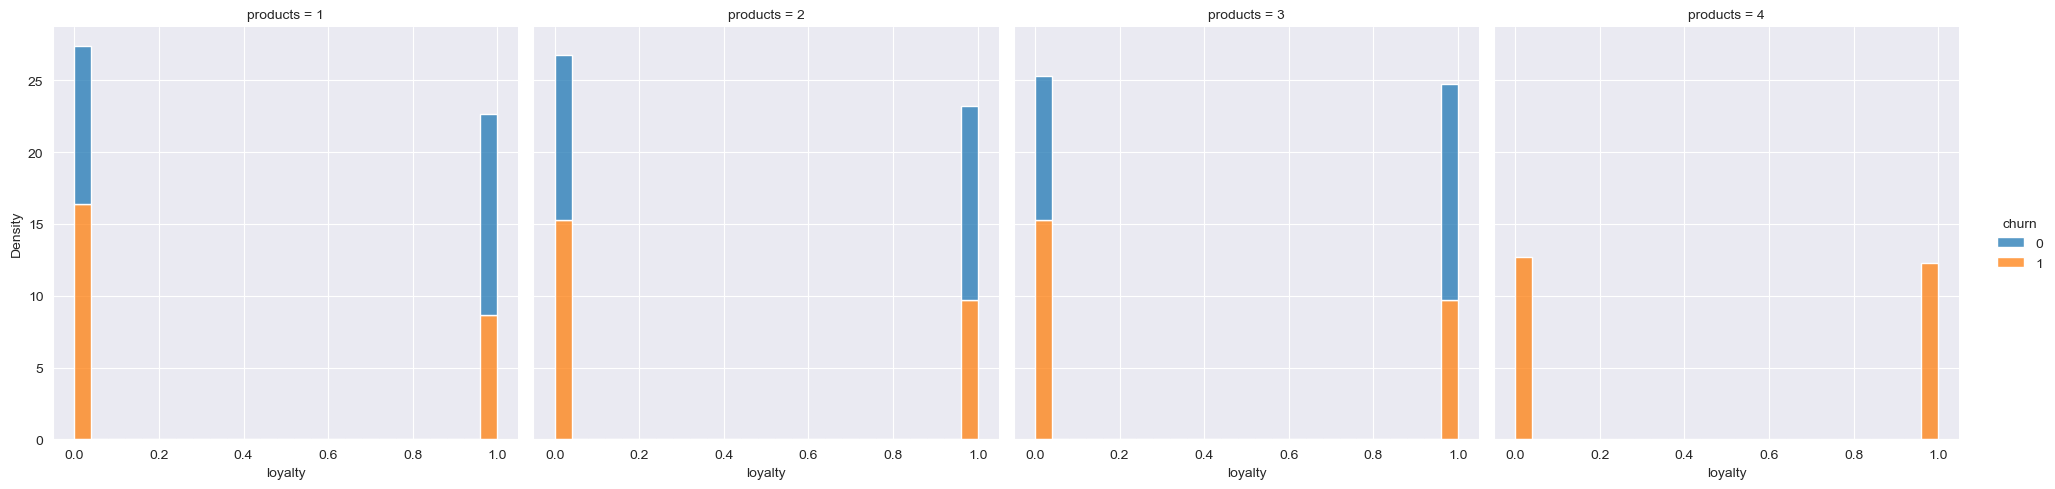

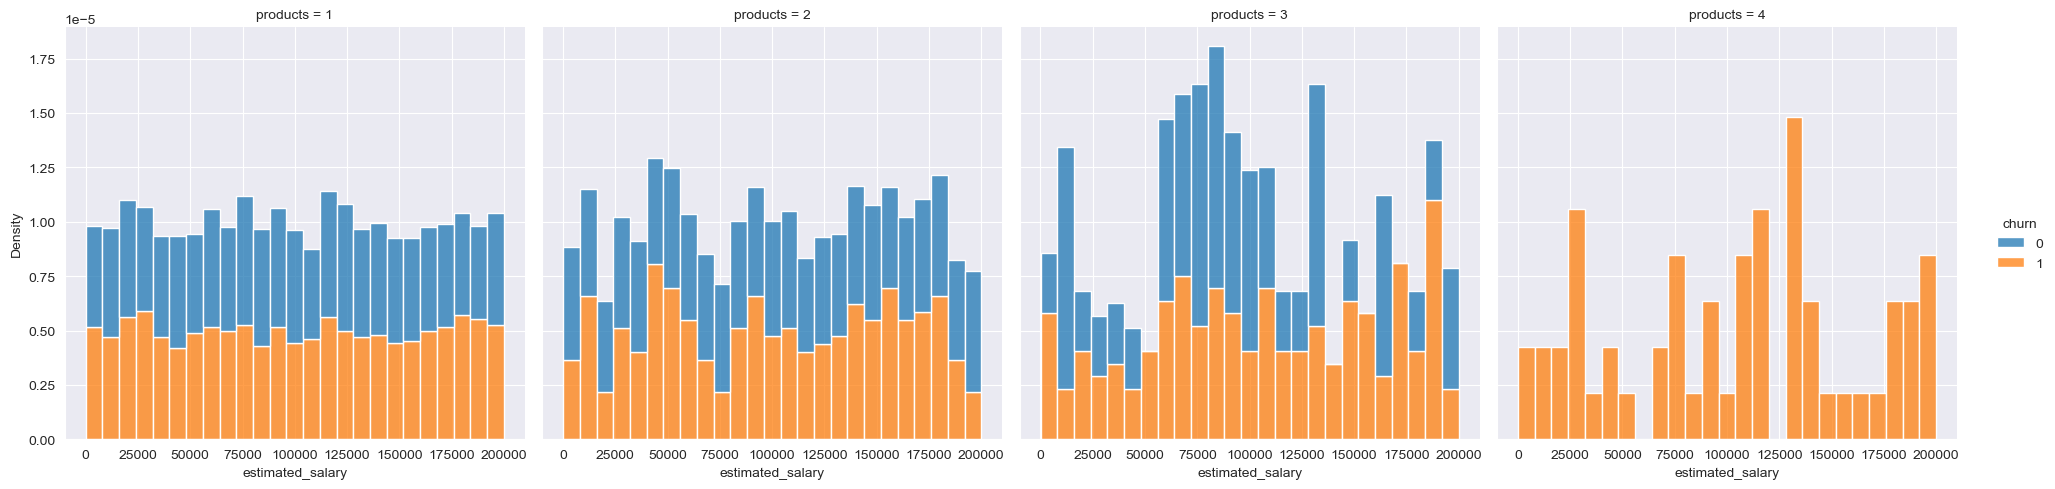

In [43]:
for i in df.columns[1:11]:
    sns.displot(data=df, 
                x=i, bins=25, col='products', hue='churn', stat='density', multiple='stack', common_norm=False,)
    plt.show()

Сгруппируем пользователей по количеству потребляемых продуктов и сравним числовые параметры каждой группы методом boxplot().

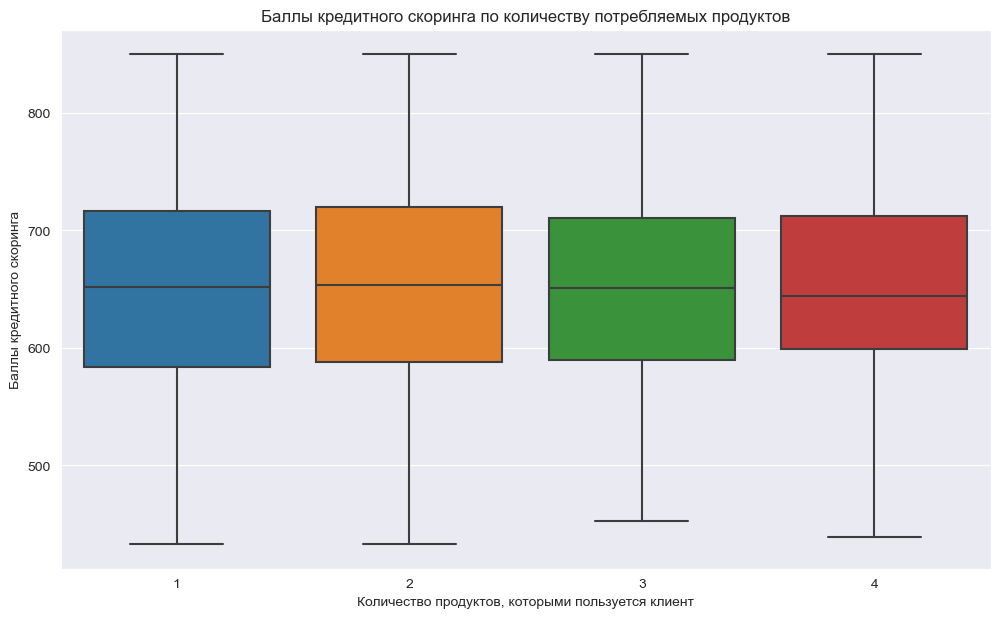

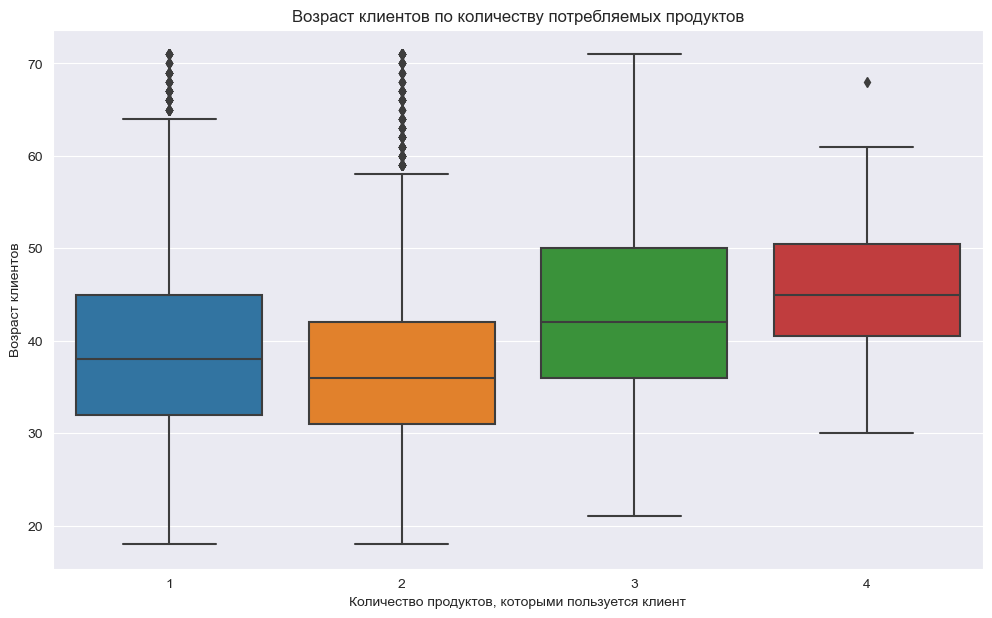

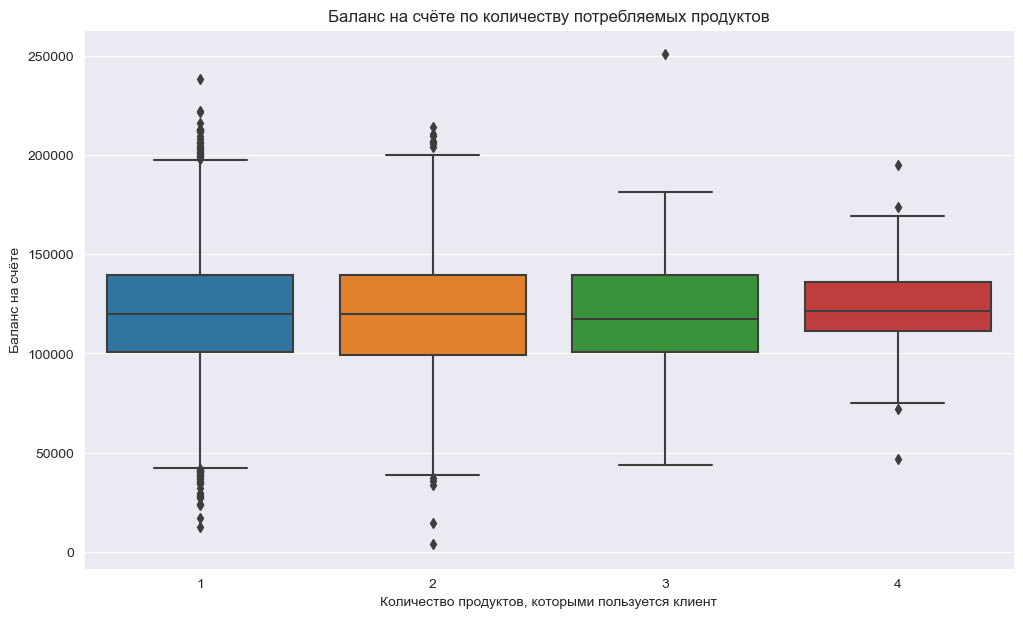

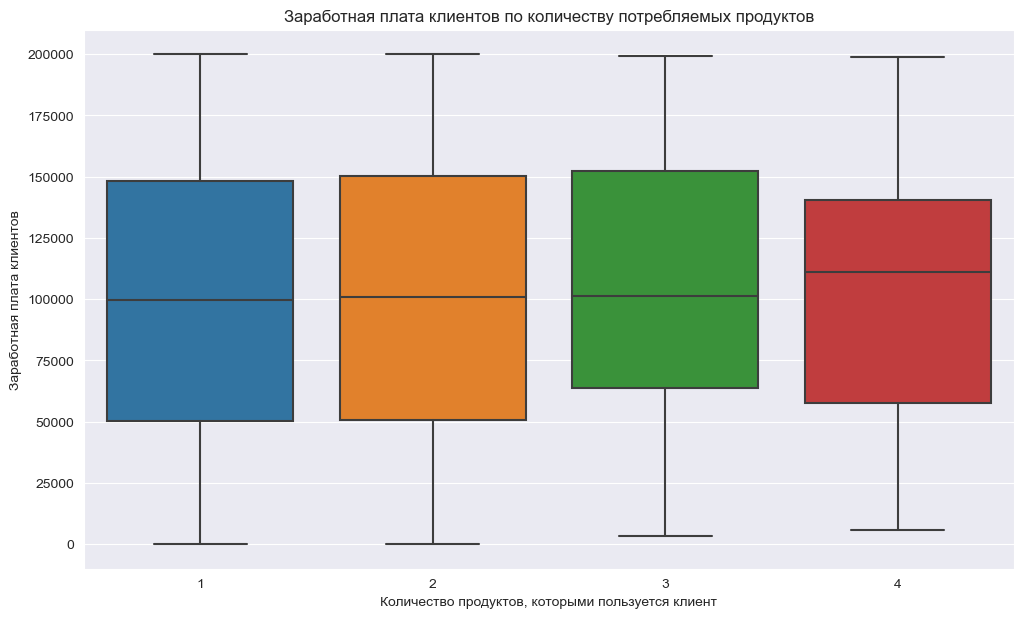

In [44]:
for i in range(len(num_col)):
    plt.figure(figsize=(12, 7))
    sns.boxplot(x='products', y=num_col[i], data=df)
    plt.xlabel('Количество продуктов, которыми пользуется клиент')
    plt.ylabel(titles_num[i])
    plt.title(f"{titles_num[i]} по количеству потребляемых продуктов")
    plt.show();

Вывод: 
- количество продуктов, которыми пользуется клиент, не зависит от баллов кредитного скоринга.
- с возрастом клиенты используют большее число продуктов, однако пенсионеры, как правило, пользуются одним-двумя-тремя продуктами.
- у клиентов, потребляющих большее количество продуктов, как правило, больше объектов в собственности.
- количество продуктов, которыми пользуется клиент, не зависит от баланса на счете.
- у клиентов, потребляющих большее количество продуктов, зарплата незначительно выше.

Сравним дискретные параметры  по количеству потребляемых продуктов.

In [45]:
# поменяем тип данных столбца churn 
df["churn"] = df['churn'].astype('object')

In [46]:
titles_cat_col = ['по городам', \
                  'в зависимости от пола', \
                  'в зависимости от числа объектов в собственности', \
                  'в зависимости от наличия кредитной карты', \
                  'в зависимости от активности', \
                  'в зависимости от того, ушёл клиент или нет']

In [47]:
cat_col = df[['city', 'gender', 'objects', 'credit_card', 'loyalty', 'churn']].columns
cat_col

Index(['city', 'gender', 'objects', 'credit_card', 'loyalty', 'churn'], dtype='object')

In [48]:
# вариант отрисовки в цикле
#for i in range(len(cat_col)):
    #df.pivot_table(index=cat_col[i], columns='products', values='user_id', aggfunc='count').plot(kind='bar', grid=True)
    #plt.title(f"Сравнение числа клиентов и потребляемых ими продуктов {titles_cat_col[i]}")
    #plt.ylabel("Количество человек")
    #plt.xlabel(cat_col[i]) 
    #plt.show()

In [49]:
#  создадим функцию по которой отрисовывается дискретные параметры по количеству потребляемых продуктов
def products_plot(df, column_name, titles_cat_col_name, products="products", user_id="user_id"):
    df.pivot_table(index=column_name, columns=products, values=user_id, aggfunc='count').plot(kind='bar', grid=True)
    plt.title(f"Сравнение числа клиентов и потребляемых ими продуктов {titles_cat_col_name}")
    plt.ylabel("Количество человек")
    plt.xlabel(column_name) 
    plt.show()

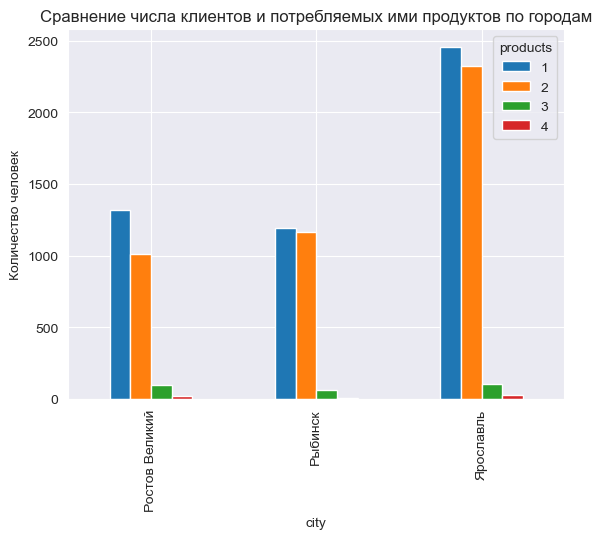

In [50]:
products_plot(df, 'city', 'по городам')

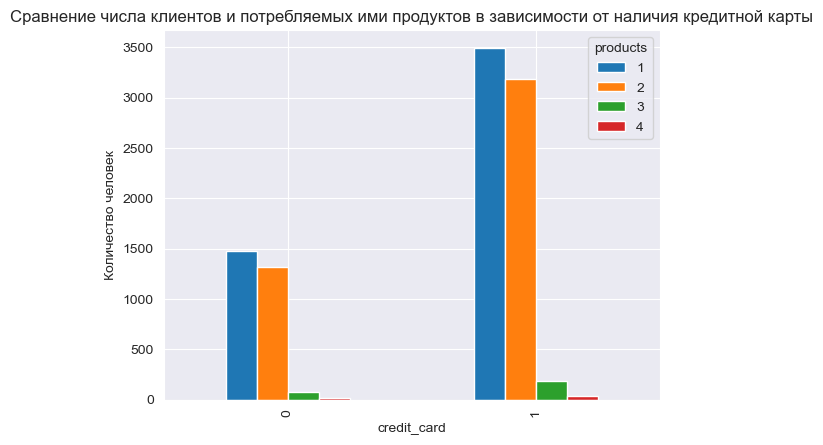

In [51]:
products_plot(df, 'credit_card', 'в зависимости от наличия кредитной карты')

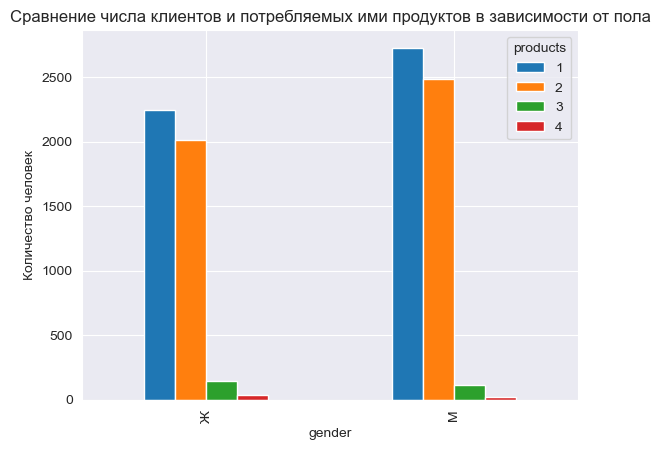

In [52]:
products_plot(df, 'gender', 'в зависимости от пола')

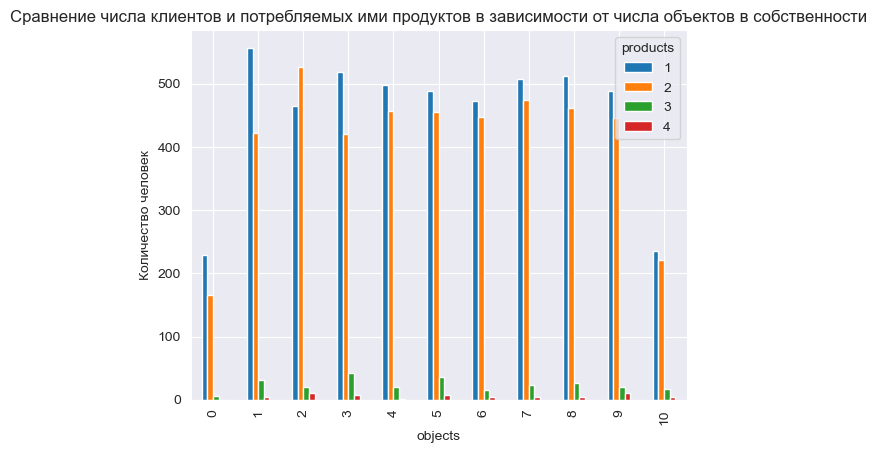

In [53]:
products_plot(df, 'objects', 'в зависимости от числа объектов в собственности')

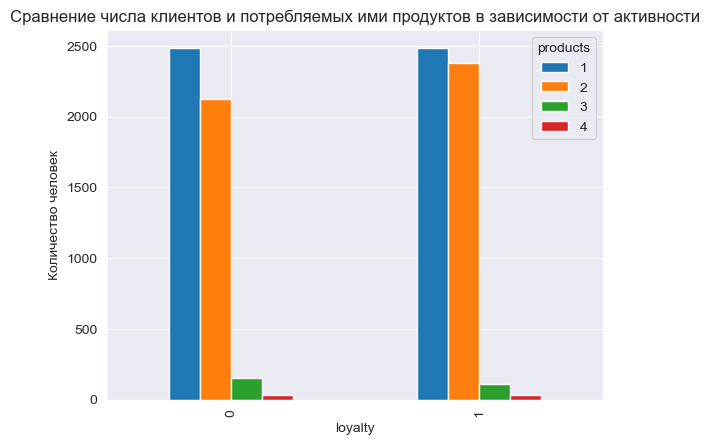

In [54]:
products_plot(df, 'loyalty', 'в зависимости от активности')

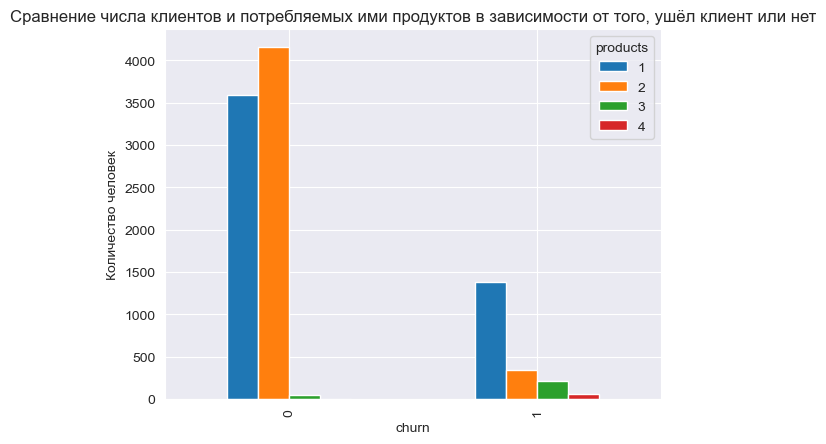

In [55]:
products_plot(df, 'churn', 'в зависимости от того, ушёл клиент или нет')

По всем дискретным параметрам лидируют с большим отрывом наличие 1, 2 продуктов.                  

In [57]:
#посмотрим на среднее значение всех признаков в разрезе количества продуктов
df.drop(['user_id'], axis=1).groupby(by='products').mean()

,score,age,objects,balance,credit_card,loyalty,estimated_salary
products,,,,,,,
1,651.732703,39.243966,4.969831,119952.560755,0.703138,0.500402,99598.579572
2,654.238053,37.336297,5.061347,119660.994460,0.706824,0.528562,100607.692321
3,652.099617,43.137931,4.946360,119054.512805,0.712644,0.425287,104049.539004
4,658.288136,45.966102,5.322034,122420.919111,0.677966,0.491525,104516.551186


Портреты клиентов по количеству потребляемых продуктов:

Клиенты с одним продуктом: средний возраст 39, но высокий процент пенсионеров. Средняя сумма на балансе 119952, высокая волатильность. Средняя вероятность ухода, но 69% от общего числа ушедших клиентов. Чаще всего есть кредитная карта. Средняя активность. Среднее количество объектов в собственности — 5, но часто ниже. Заработная плата ниже среднего. Баллы кредитного скоринга чаще ниже среднего.

Клиенты с двумя продуктами: средний возраст 37 лет, но высокий процент пенсионеров. Средняя сумма на балансе 119660, высокая волатильность. Наименьшая вероятность ухода. Чаще всего есть кредитная карта. Активность выше среднего. Среднее количество объектов в собственности — 5. Заработная плата выше среднего. Число баллов кредитного скоринга выше среднего.

Клиенты с тремя продуктами: средний возраст 43, процент пенсионеров выше среднего. Средняя сумма на балансе 119054, волатильность ниже среднего. Почти все клиенты ушли -80%, от общего числа 10%. Чаще всего есть кредитная карта. Активность ниже среднего. Среднее количество объектов в собственности — 5, часто выше. Заработная плата выше среднего. Среднее число баллов кредитного скоринга.

Клиенты с четырьмя продуктами: средний возраст 46, процент пенсионеров низкий. Средняя сумма на балансе 122420 — выше, чем у остальных групп, волатильность низкая. Все клиенты ушли. Чаще всего есть кредитная карта, но реже, чем у остальных групп. Средняя активность. Среднее количество объектов в собственности — 5, часто выше. Заработная плата выше среднего. Среднее число баллов кредитного скоринга.

В результате проведенного анализа выявлены следующие закономерности: 
- есть прямая зависимость между возрастом и колличеством продуктов и оттоком, а именно 4 продукта имеют клиенты с наибольшим средним возрастом и все они попадают в категорию оттока.
- после 2-ух продуктов начинается резкий рост оттока клиентов.



Рекомендации: 
 - Для клиентов с одним продуктом можно больше предлагать дополнительных продуктов, чтобы снизить вероятность оттока. 
 - Для клиентов с двумя продуктами не предлагать 3-й продукт или ввести более лояльные условия по новым продуктам.
 - Для клиентов с тремя продуктами не предлагать 4-ый продукт.
 - Для клиентов с четырьмя продуктами провести опрос на причину ухода, она требует дальнейшего изучения.

#### 5. Статистическая проверка гипотез.

Выдвеним гипотезу №1 различия возраста между теми клиентами, которые пользуются двумя продуктами банка, и теми, которые пользуются одним и гипотезу №2 о различии в доле держателей кредитных карт среди клиентов, оставшихся и ушедших.


Проверка статистической значимости разницы между группами предполагает формулировку нулевой и альтернативной гипотез, установку уровня значимости.

Оставим уровень значимости на уровне 5%. Таким образом, если результат работы функции (минимальный уровень значимости p-value) будет меньше установленного уровня значимости, то нулевая гипотеза отвергается в пользу альтернативной, а если минимальный уровень значимости больше установленного уровня значимости в 5%, то тогда отвергнуть нулевую гипотезу не получится.

Проверим гипотезу №1: Сущетсвуют различия возраста между теми клиентами, которые пользуются двумя продуктами банка, и теми, которые пользуются одним.

Сформулируем нулевую гипотезу:

HO: средний возраст клиентов, которые пользуются двумя продуктами банка, и теми, которые пользуются одним равен.

Сформулируем альтернативную гипотезу:

H1: средний возраст клиентов, которые пользуются двумя продуктами банка, и теми, которые пользуются одним различен.

Для проверки уровня статистической значимости будем применять t-критерий, так как он используется для проверки того, равны ли средние значения двух выборок при нормальном распределении.

In [58]:
# results = вызов метода для проверки гипотезы

results = st.ttest_ind (
    df[df['products']==1]['age'],
    df[df['products']==2]['age'], equal_var = False)


alpha = 0.05

# вывод значения p-value на экран 
print (results.pvalue) 
# условный оператор с выводом строки с ответом

if results.pvalue < alpha:
    print ('Отвергаем нулевую гипотезу')
else:
    print ('Не получилось отвергнуть нулевую гипотезу')

1.2942165932633815e-21
Отвергаем нулевую гипотезу


При расчете, t-тест показал, что есть статистически значимые различия среднего возраста  клиентов в группах с 1 и 2 продуктами. 

In [59]:
df[df['products']==1]['age'].mean()


39.24396621078037

In [60]:
df[df['products']==2]['age'].mean()

37.33629695487886

Проверим гипотезу №2: Существует ли разница в доле держателей кредитных карт среди клиентов, оставшихся и ушедших.


HO: Доли держателей кредитных карт оставшихся и ушедших клиентов одинаковые.

Сформулируем альтернативную гипотезу:

H1: Доли держателей кредитных карт оставшихся и ушедших клиентов разные.


Для проверки уровня статистической значимости будем применять Z-критерий, так как переменная бинарная - доля держателей кредитных карт к оставшимся и ушедшим клиентам.


In [61]:

def z_test(df, alpha):
   
    
    # критический уровень статистической значимости
    alpha 
    
    # число пользователей в группе 1 и группе 2:
    n_users = np.array([df.loc[df["churn"] == 1, 'user_id'].nunique(), 
                        df.loc[df["churn"] == 0, 'user_id'].nunique()])
    # число пользователей, совершивших событие в группе 1 и группе 2
    success = np.array([df.loc[(df["credit_card"] == 1) & (df["churn"] == 1), 'user_id'].nunique(), 
                        df.loc[(df["credit_card"] == 1) & (df["churn"] == 0), 'user_id'].nunique()])
    
    # пропорции успехов в группах:
    p1 = success[0]/n_users[0]
    p2 = success[1]/n_users[1]
    
    # пропорция успехов в комбинированном датасете:
    p_combined = (success[0] + success[1]) / (n_users[0] + n_users[1])

    # разница пропорций в датасетах
    difference = p1 - p2 

    # считаем статистику в ст.отклонениях стандартного нормального распределения
    z_value = difference /  np.sqrt(p_combined * (1 - p_combined) * (1/n_users[0] + 1/n_users[1]))

    # задаем стандартное нормальное распределение (среднее 0, ст.отклонение 1)
    distr = st.norm(0, 1)  

    p_value = (1 - distr.cdf(abs(z_value))) * 2   #тест двусторонний, удваиваем результат
    
    print('p-значение: ', p_value)

    if p_value < alpha:
        print('Отвергаем нулевую гипотезу: между долями есть разница')
    else:
        print(
        'Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными')

In [62]:
z_test(df, 0.05)

p-значение:  0.4206084564158816
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными


In [63]:
n_users = np.array([df.loc[df["churn"] == 1, 'user_id'].nunique(), 
                        df.loc[df["churn"] == 0, 'user_id'].nunique()])
success = np.array([df.loc[(df["credit_card"] == 1) & (df["churn"] == 1), 'user_id'].nunique(), 
                        df.loc[(df["credit_card"] == 1) & (df["churn"] == 0), 'user_id'].nunique()])
    
# пропорции успехов в группах:
print(f"Доля ушедших клиентов с кредитными картами {success[0]/n_users[0]:.3}")
print(f"Доля оставшихся клиентов с кредитными картами {success[1]/n_users[1]:.3}")

Доля ушедших клиентов с кредитными картами 0.698
Доля оставшихся клиентов с кредитными картами 0.707


При расчете, Z-тест показал отсутствие статистической значимости доли держателей кредитных карт в группах ушедших и не ушедших пользователей. Вывод о различии долей сделать нельзя.

  
Тесты проводились с целью проверки гипотез, для выявления причин оттока клиентов в банке. По проведенным расчетам t-тест показал статистически значимые различия в возрасте между теми клиентами, которые пользуются двумя продуктами банка, и теми, которые пользуются одним, а при проверке второй гипотезы Z-тестом не было выявлено значимой разницы в доле держателей кредитных карт среди клиентов, оставшихся и ушедших.

<div class='alert alert-success'> 👍
Проверка гипотез выполнена в полно мере корректно, но для проверки гипотез о долях рекомендую использовать библиотечные функции. 

презентация
https://disk.yandex.ru/i/ktFO_yhynighfA

дашборд
https://public.tableau.com/app/profile/anna8591/viz/Book2_16798667980170/Dashboard1?publish=yes